In [1]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape),print(y_train.shape),print(x_test.shape),print(y_test.shape)  ### 10,000 images with size 28x28

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(None, None, None, None)

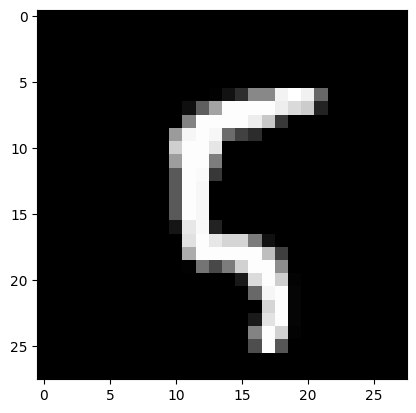

In [4]:
from matplotlib import image
image_index= 100
plt.imshow(x_train[image_index],cmap='gray')
plt.show()

In [5]:
### Reshaping the Dataset
### Keras input format ( number of images, rows, columns, dimension of the image)
x_train = x_train.reshape(x_train.shape[0],28,28,1)  ### 1 in-case of grey scale image and 3 in case of RGB image
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
### Data Scaling and normalization
"""
Done to make the algorithm run faster.
Subtracting the values to distribute the values uniformly around 0
"""

### Explicitly converting the values to float so that we can get decimal points after division

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Normalizing the RGB codes by dividing it to the max RGB value
x_train /= 255- 0.5
x_test /= 255- 0.5

In [7]:
### Creating a Sequential model for CNN in keras

num_filters = 8
filter_size =  3   ### 3x3 dimension filter
pool_size = 2   ### Pooling filter for maxpool layer is of size 2


model = Sequential()
model.add(Conv2D(num_filters,filter_size,strides=(1,1),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 8) dtype=float32, numpy=
 array([[[[ 0.21925613, -0.21749368,  0.07737625, -0.02238403,
            0.00811589,  0.17325085,  0.08851767, -0.17420277]],
 
         [[ 0.25774425,  0.22940981,  0.15148333, -0.08851714,
            0.03410277, -0.27196893,  0.09268543,  0.09640482]],
 
         [[ 0.10589924, -0.09095399,  0.18381333, -0.03728929,
            0.18611243,  0.2538777 , -0.02276888,  0.24956548]]],
 
 
        [[[ 0.13008946,  0.02764285, -0.17790347,  0.11932886,
           -0.08738482, -0.22257537, -0.27066237, -0.01111871]],
 
         [[ 0.23644781,  0.1594269 ,  0.06129712, -0.06342763,
           -0.03406404, -0.20437124,  0.03092179,  0.03556481]],
 
         [[ 0.11875179, -0.2137264 , -0.18448313, -0.13229369,
            0.05102402,  0.2167171 , -0.10146095, -0.09106813]]],
 
 
        [[[ 0.11027876, -0.152104  , -0.21136048,  0.0314475 ,
            0.25504208,  0.20836511,  0.26152146,  0.08842358]],
 
         [[

In [10]:
## compiling the model
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
## Training the model
model.fit(x_train,to_categorical(y_train),epochs = 3,verbose=1,validation_data=(x_test,to_categorical(y_test)),)

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3321 - accuracy: 0.9060 - val_loss: 0.2009 - val_accuracy: 0.9429
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1809 - accuracy: 0.9486 - val_loss: 0.1494 - val_accuracy: 0.9548
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1363 - accuracy: 0.9613 - val_loss: 0.1225 - val_accuracy: 0.9636


In [11]:
score = model.evaluate(x_test,to_categorical(y_test),verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:',score[1])

Test Loss: 0.12248709797859192
Test Accuracy: 0.9635999798774719


In [12]:
### Predicting the first 5 images
predictions = model.predict(x_test[:5])

1/1 [==============================] - 0s 78ms/step


In [13]:
### Printing the models output, here we will be printing the max values of the 
print(np.argmax(predictions,axis=1)) ### Index Values for the Predected Image
print(y_test[:5]) ### ### Index Values for the Actual Image

[7 2 1 0 4]
[7 2 1 0 4]
